In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [128]:
df_tree_street = pd.read_csv("la_tree_street_filtered.csv")
df_tree_parks = pd.read_csv("la_tree_park_filtered.csv")
df_fire = pd.read_csv("la_city_wildfire_cleaned.csv")

In [129]:
df_tree_street

,Latitude,Longitude,Species,DBH
0,34.057989,-118.316354,velvet ash; Arizona ash (Fraxinus velutina),17.0
1,34.057987,-118.316122,ash species (Fraxinus spp.),21.0
2,34.057984,-118.316252,ash species (Fraxinus spp.),21.0
3,34.057924,-118.316600,majesty palm (Ravenea rivularis),7.0
4,34.057840,-118.316591,queen palm (Syagrus romanzoffiana),11.0
...,...,...,...,...
706095,33.744020,-118.312476,Canary Island pine (Pinus canariensis),31.0
706096,33.744035,-118.312338,Canary Island pine (Pinus canariensis),11.0
706097,33.744032,-118.312256,Canary Island pine (Pinus canariensis),13.0
706098,33.743705,-118.312578,Canary Island pine (Pinus canariensis),30.0


In [130]:
sum(df_tree_street.duplicated())

24

In [131]:
df_tree_street['Any_Protected'] = False

In [132]:
df_tree_street

,Latitude,Longitude,Species,DBH,Any_Protected
0,34.057989,-118.316354,velvet ash; Arizona ash (Fraxinus velutina),17.0,False
1,34.057987,-118.316122,ash species (Fraxinus spp.),21.0,False
2,34.057984,-118.316252,ash species (Fraxinus spp.),21.0,False
3,34.057924,-118.316600,majesty palm (Ravenea rivularis),7.0,False
4,34.057840,-118.316591,queen palm (Syagrus romanzoffiana),11.0,False
...,...,...,...,...,...
706095,33.744020,-118.312476,Canary Island pine (Pinus canariensis),31.0,False
706096,33.744035,-118.312338,Canary Island pine (Pinus canariensis),11.0,False
706097,33.744032,-118.312256,Canary Island pine (Pinus canariensis),13.0,False
706098,33.743705,-118.312578,Canary Island pine (Pinus canariensis),30.0,False


In [133]:
df_tree_parks

,Latitude,Longitude,Species,Diameter,Any_Protected
0,34.040379,-118.242485,Indian laurel fig (Ficus microcarpa),20.0,False
1,34.040320,-118.242379,Indian laurel fig (Ficus microcarpa),22.0,False
2,34.040205,-118.242635,African fern pine (Afrocarpus falcatus),5.0,False
3,34.040299,-118.242609,London plane tree (Platanus x hispanica),16.0,False
4,34.040344,-118.242567,London plane tree (Platanus x hispanica),16.0,False
...,...,...,...,...,...
142116,34.281487,-118.524730,swamp mallee (Eucalyptus spathulata),1.0,False
142117,34.281391,-118.524696,swamp mallee (Eucalyptus spathulata),1.0,False
142118,34.281378,-118.524487,swamp mallee (Eucalyptus spathulata),1.0,False
142119,34.281584,-118.524269,swamp mallee (Eucalyptus spathulata),1.0,False


In [134]:
df_tree_parks = df_tree_parks.rename(columns={"Diameter": "DBH"})

In [135]:
sum(df_tree_parks.duplicated())

3

In [136]:
df_trees_combined = pd.concat([df_tree_street, df_tree_parks], axis=0, ignore_index=True)

In [137]:
df_trees_combined

,Latitude,Longitude,Species,DBH,Any_Protected
0,34.057989,-118.316354,velvet ash; Arizona ash (Fraxinus velutina),17.0,False
1,34.057987,-118.316122,ash species (Fraxinus spp.),21.0,False
2,34.057984,-118.316252,ash species (Fraxinus spp.),21.0,False
3,34.057924,-118.316600,majesty palm (Ravenea rivularis),7.0,False
4,34.057840,-118.316591,queen palm (Syagrus romanzoffiana),11.0,False
...,...,...,...,...,...
848216,34.281487,-118.524730,swamp mallee (Eucalyptus spathulata),1.0,False
848217,34.281391,-118.524696,swamp mallee (Eucalyptus spathulata),1.0,False
848218,34.281378,-118.524487,swamp mallee (Eucalyptus spathulata),1.0,False
848219,34.281584,-118.524269,swamp mallee (Eucalyptus spathulata),1.0,False


In [138]:
sum(df_trees_combined.duplicated())

27

In [139]:
df_trees_combined = df_trees_combined.drop_duplicates()

In [140]:
df_trees_combined

,Latitude,Longitude,Species,DBH,Any_Protected
0,34.057989,-118.316354,velvet ash; Arizona ash (Fraxinus velutina),17.0,False
1,34.057987,-118.316122,ash species (Fraxinus spp.),21.0,False
2,34.057984,-118.316252,ash species (Fraxinus spp.),21.0,False
3,34.057924,-118.316600,majesty palm (Ravenea rivularis),7.0,False
4,34.057840,-118.316591,queen palm (Syagrus romanzoffiana),11.0,False
...,...,...,...,...,...
848216,34.281487,-118.524730,swamp mallee (Eucalyptus spathulata),1.0,False
848217,34.281391,-118.524696,swamp mallee (Eucalyptus spathulata),1.0,False
848218,34.281378,-118.524487,swamp mallee (Eucalyptus spathulata),1.0,False
848219,34.281584,-118.524269,swamp mallee (Eucalyptus spathulata),1.0,False


In [141]:
df_trees_combined.to_csv("la_trees_combined.csv", index=False)

# LA fire

In [142]:
df_fire

,Damage,Incident Start Date,Hazard_Type,Latitude,Longitude,City,Structure_Type,year,month
0,No Damage,2017-12-06,Fire,34.095153,-118.469189,Los Angeles,Single Family Residence Multi Story,2017,12
1,No Damage,2017-12-06,Fire,34.094989,-118.468803,Los Angeles,Single Family Residence Multi Story,2017,12
2,No Damage,2017-12-06,Fire,34.094337,-118.468786,Los Angeles,Single Family Residence Multi Story,2017,12
3,No Damage,2017-12-06,Fire,34.093915,-118.468773,Los Angeles,Single Family Residence Multi Story,2017,12
4,No Damage,2017-12-06,Fire,34.090212,-118.469683,Los Angeles,Single Family Residence Multi Story,2017,12
...,...,...,...,...,...,...,...,...,...
305,Affected (1-9%),2019-10-10,Fire,34.290280,-118.568069,Los Angeles,Single Family Residence Multi Story,2019,10
306,Inaccessible,2019-10-10,Fire,34.292428,-118.537482,Los Angeles,Single Family Residence Multi Story,2019,10
307,Inaccessible,2019-10-10,Fire,34.291988,-118.536826,Los Angeles,Single Family Residence Single Story,2019,10
308,Minor (10-25%),2019-10-10,Fire,34.283501,-118.530599,Los Angeles,Single Family Residence Multi Story,2019,10


In [143]:
sum(df_fire.duplicated())

0

In [144]:
np.unique(df_fire["Incident Start Date"])

array(['2017-12-05', '2017-12-06', '2019-10-10'], dtype=object)

In [145]:
df_fire.columns

Index(['Damage', 'Incident Start Date', 'Hazard_Type', 'Latitude', 'Longitude',
       'City', 'Structure_Type', 'year', 'month'],
      dtype='object')

In [167]:
print(df_fire[['Latitude', 'Longitude']].duplicated().sum())

0


# Visualization

In [147]:
df_fire.shape

(310, 9)

In [148]:
df_trees_combined.shape

(848194, 5)

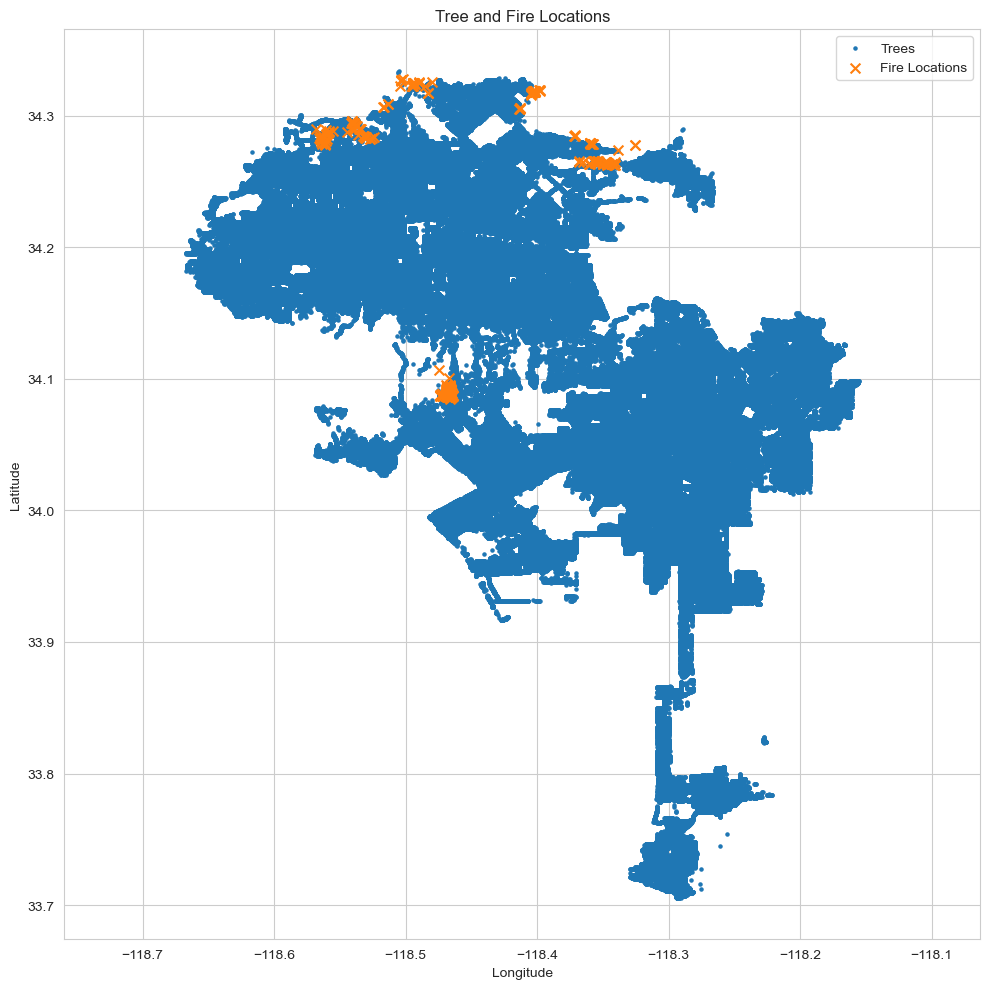

In [150]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all trees
ax.scatter(
    df_trees_combined['Longitude'],
    df_trees_combined['Latitude'],
    s=5,
    label='Trees'
)

# Plot all fire locations
ax.scatter(
    df_fire['Longitude'],
    df_fire['Latitude'],
    s=50,
    marker='x',
    label='Fire Locations'
)

# Labels, title, legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Tree and Fire Locations')
ax.legend(loc='upper right')

plt.axis('equal')
plt.tight_layout()
plt.show()


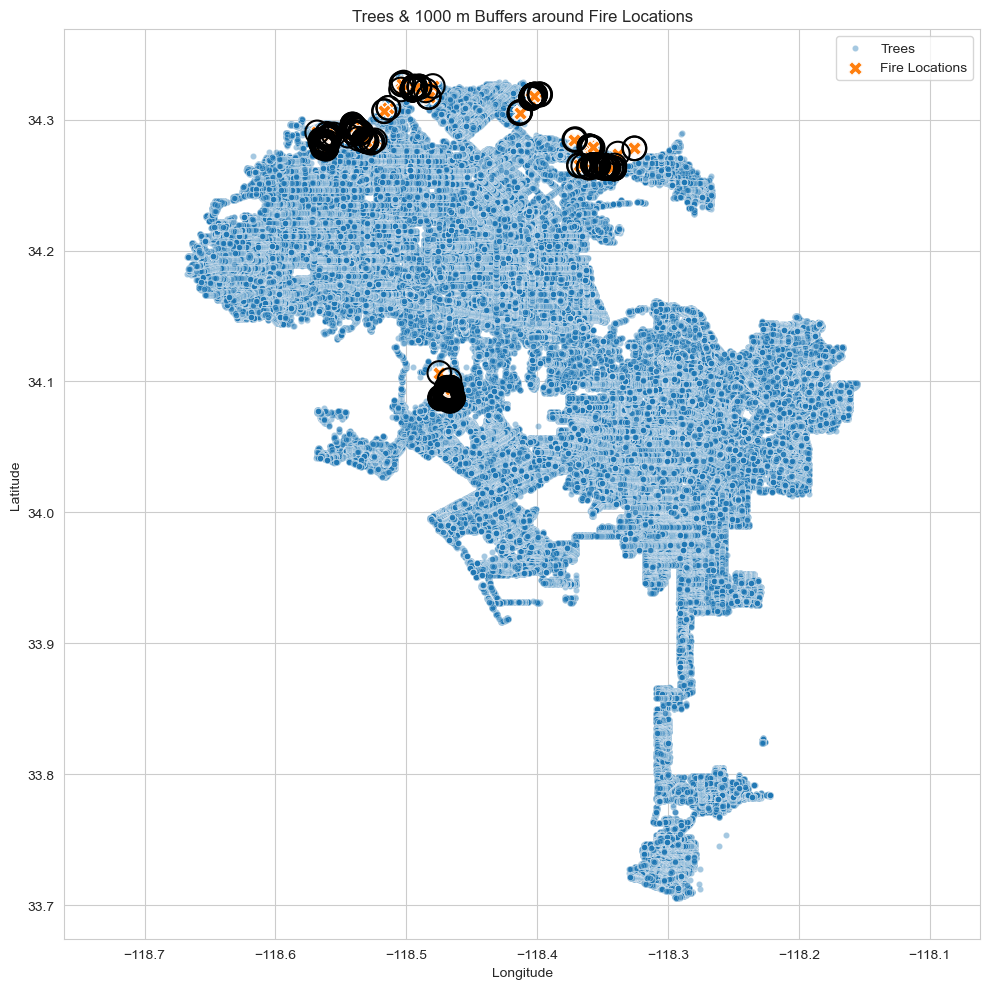

In [151]:
# 1. Set a seaborn style
sns.set_style("whitegrid")

# 2. Parameters
radius_m   = 1000
deg_per_m  = 1 / 111000  # approx degrees latitude per meter

# 3. Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# 4. Plot trees
sns.scatterplot(
    x='Longitude', y='Latitude',
    data=df_trees_combined,
    s=20, alpha=0.4,
    ax=ax,
    label='Trees'
)

# 5. Plot fires
sns.scatterplot(
    x='Longitude', y='Latitude',
    data=df_fire,
    marker='X', s=100,
    ax=ax,
    label='Fire Locations'
)

# 6. Add 50 m circles around each fire
for _, fire in df_fire.iterrows():
    lon, lat = fire['Longitude'], fire['Latitude']
    circ = Circle(
        (lon, lat),
        radius_m * deg_per_m,
        edgecolor='black',
        facecolor='none',
        linewidth=1.5
    )
    ax.add_patch(circ)

# 7. Final formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Trees & 1000 m Buffers around Fire Locations')
ax.legend(loc='upper right')
ax.axis('equal')
plt.tight_layout()
plt.show()


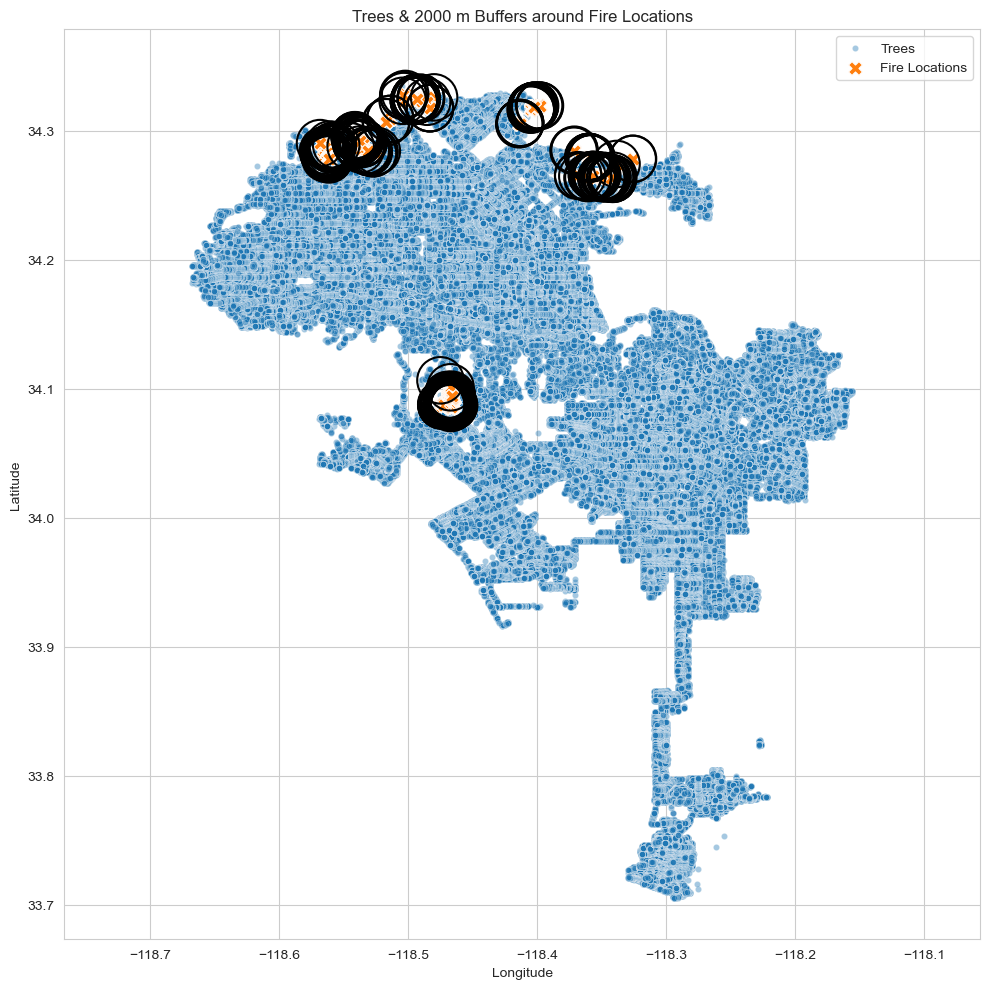

In [152]:
# 1. Set a seaborn style
sns.set_style("whitegrid")

# 2. Parameters
radius_m   = 2000
deg_per_m  = 1 / 111000  # approx degrees latitude per meter

# 3. Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# 4. Plot trees
sns.scatterplot(
    x='Longitude', y='Latitude',
    data=df_trees_combined,
    s=20, alpha=0.4,
    ax=ax,
    label='Trees'
)

# 5. Plot fires
sns.scatterplot(
    x='Longitude', y='Latitude',
    data=df_fire,
    marker='X', s=100,
    ax=ax,
    label='Fire Locations'
)

# 6. Add 50 m circles around each fire
for _, fire in df_fire.iterrows():
    lon, lat = fire['Longitude'], fire['Latitude']
    circ = Circle(
        (lon, lat),
        radius_m * deg_per_m,
        edgecolor='black',
        facecolor='none',
        linewidth=1.5
    )
    ax.add_patch(circ)

# 7. Final formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Trees & 2000 m Buffers around Fire Locations')
ax.legend(loc='upper right')
ax.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import BallTree

# 1. Prepare coords in radians
fire_coords = np.deg2rad(df_fire[['Latitude','Longitude']].values)
tree_coords = np.deg2rad(df_trees_combined[['Latitude','Longitude']].values)

# 2. Build a BallTree with Haversine metric
tree = BallTree(fire_coords, metric='haversine')

# 3. Query each tree: returns array of lists of fire‐indices within r
radius_m   = 2000
earth_rad  = 6_371_000  # meters
radius_rad = radius_m / earth_rad

# `ind` is an array of length n_trees; each element is a list of fire‐indices within r
ind = tree.query_radius(tree_coords, r=radius_rad)

# 4. Build a boolean mask: True if a tree has **any** neighbor
mask = np.array([len(lst)>0 for lst in ind])

# 5. Subset your tree DataFrame
df_unique_near_trees = df_trees_combined[mask].copy().reset_index(drop=True)
print(df_unique_near_trees.shape)

(35071, 5)


In [155]:
df_unique_near_trees

,Latitude,Longitude,Species,DBH,Any_Protected
0,34.069508,-118.467395,MyLA311 Added (MyLA311 Added),0.0,False
1,34.275480,-118.541392,MyLA311 Added (MyLA311 Added),0.0,False
2,34.089382,-118.452487,coast live oak (Quercus agrifolia),10.0,False
3,34.089431,-118.452449,coast live oak (Quercus agrifolia),10.0,False
4,34.089129,-118.452503,coast live oak (Quercus agrifolia),10.0,False
...,...,...,...,...,...
35066,34.281487,-118.524730,swamp mallee (Eucalyptus spathulata),1.0,False
35067,34.281391,-118.524696,swamp mallee (Eucalyptus spathulata),1.0,False
35068,34.281378,-118.524487,swamp mallee (Eucalyptus spathulata),1.0,False
35069,34.281584,-118.524269,swamp mallee (Eucalyptus spathulata),1.0,False


In [156]:
# 1. Prepare coordinate arrays in radians
fire_coords = np.deg2rad(df_fire[['Latitude','Longitude']].values)
tree_coords = np.deg2rad(df_trees_combined[['Latitude','Longitude']].values)

# 2. Build the BallTree
tree = BallTree(fire_coords, metric='haversine')

# 3. Query nearest fire for each tree
radius_m  = 2000
earth_rad = 6_371_000
dist_rad, idx = tree.query(tree_coords, k=1)
dist_m = dist_rad.flatten() * earth_rad

# 4. Filter trees within radius_m
mask = dist_m <= radius_m
df_near = df_trees_combined[mask].copy().reset_index(drop=True)

# 5. Annotate nearest fire index & distance
df_near['fire_idx']   = idx.flatten()[mask]
df_near['distance_m'] = dist_m[mask]

# 6. Prepare fire DF for merge
df_fire2 = df_fire.reset_index().rename(columns={'index': 'fire_idx'})

# 7. Merge tree + fire info
df_merged = df_near.merge(
    df_fire2,
    on='fire_idx',
    how='left'
).drop(columns=['fire_idx'])

print(df_merged.shape)
df_merged.head()

(35071, 15)


,Latitude_x,Longitude_x,Species,DBH,Any_Protected,distance_m,Damage,Incident Start Date,Hazard_Type,Latitude_y,Longitude_y,City,Structure_Type,year,month
0,34.069508,-118.467395,MyLA311 Added (MyLA311 Added),0.0,False,1722.695116,No Damage,2017-12-06,Fire,34.084989,-118.466654,Los Angeles,Single Family Residence Multi Story,2017,12
1,34.275480,-118.541392,MyLA311 Added (MyLA311 Added),0.0,False,1190.632514,Affected (1-9%),2019-10-10,Fire,34.285419,-118.536571,Los Angeles,Single Family Residence Multi Story,2019,10
2,34.089382,-118.452487,coast live oak (Quercus agrifolia),10.0,False,1103.887607,No Damage,2017-12-06,Fire,34.087409,-118.464235,Los Angeles,Single Family Residence Multi Story,2017,12
3,34.089431,-118.452449,coast live oak (Quercus agrifolia),10.0,False,1108.382373,No Damage,2017-12-06,Fire,34.087409,-118.464235,Los Angeles,Single Family Residence Multi Story,2017,12
4,34.089129,-118.452503,coast live oak (Quercus agrifolia),10.0,False,1097.172609,No Damage,2017-12-06,Fire,34.087409,-118.464235,Los Angeles,Single Family Residence Multi Story,2017,12


In [158]:
merged_data = df_merged.rename(columns={
    'Latitude_x': 'Latitude_tree', 
    'Longitude_x': 'Longitude_tree',
    'Latitude_y': 'Latitude_fire', 
    'Longitude_y': 'Longitude_fire'
})

In [163]:
print(merged_data[['Latitude_tree', 'Longitude_tree']].duplicated().sum())
print(merged_data[['Latitude_fire', 'Longitude_fire']].duplicated().sum())

0
34892


In [168]:
merged_data.to_csv("la_trees_near_fire.csv", index=False)